#### We will compare performance and accuracy aspects of "NaiveBayes" and "LogisticRegression"  algorithms within Titanic Dataset.


In [1]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read in file
train_original = pd.read_csv('./data/train.csv')
test_original = pd.read_csv('./data/test.csv')
train_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_original.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Preparing Data

In [4]:
#Creating seperate train sets for each ML Algorithm. 
df_logreg_train = train_original.copy()
df_logreg_test = test_original.copy()

#Dropping name, passengerId and ticket columns.
df_logreg_test.drop(["PassengerId", "Ticket","Name"], axis=1, inplace=True)
df_logreg_train.drop(["PassengerId", "Ticket","Name"], axis=1, inplace=True)
#Missing age fields are filled with mean
df_logreg_train["Age"].fillna(df_logreg_train.Age.median(), inplace=True)
df_logreg_test["Age"].fillna(df_logreg_test.Age.median(),inplace=True)
#Missing Fare and Cabin values are also filled
df_logreg_train["Fare"].fillna(df_logreg_train.Fare.median(), inplace=True)
df_logreg_train["Embarked"].fillna(df_logreg_train.Embarked.mode()[0], inplace=True)
df_logreg_test["Fare"].fillna(df_logreg_test.Fare.median(), inplace=True)
df_logreg_test["Embarked"].fillna(df_logreg_test.Embarked.mode()[0], inplace=True)
df_logreg_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


Cabin has too many empty fields and it is not good idea to fill it with "median" modes. We will fill NaN fields with "Missing" instead, symbolized with M.

In [5]:
df_logreg_train["Cabin"].fillna('M', inplace=True)
df_logreg_test["Cabin"].fillna('M', inplace=True)
df_logreg_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,M,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,M,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,M,S


In [6]:
df_logreg_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,M,Q
1,3,female,47.0,1,0,7.0000,M,S
2,2,male,62.0,0,0,9.6875,M,Q
3,3,male,27.0,0,0,8.6625,M,S
4,3,female,22.0,1,1,12.2875,M,S


In [7]:
#Slicing data, preparing it for Logistic Regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = df_logreg_train.iloc[:, 1:].values #Disregarding "Survived" Columnsss
X_test = df_logreg_test.iloc[:, 0:].values
y = df_logreg_train.iloc[:, 0].values
X_test[0]

array([3, 'male', 34.5, 0, 0, 7.8292, 'M', 'Q'], dtype=object)

In [8]:
#cabin encoding
label_encoder = LabelEncoder()
print(X[:, 6])
X[: , 6] = label_encoder.fit_transform(X[: , 6])
X[: , 6]
X_test[: , 6] = label_encoder.fit_transform(X_test[: , 6])

['M' 'C85' 'M' 'C123' 'M' 'M' 'E46' 'M' 'M' 'M' 'G6' 'C103' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'D56' 'M' 'A6' 'M' 'M' 'M' 'C23 C25 C27' 'M' 'M' 'M'
 'B78' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'D33' 'M' 'B30' 'C52' 'M' 'M' 'M' 'M' 'M' 'B28' 'C83' 'M' 'M'
 'M' 'F33' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F G73' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'C23 C25 C27' 'M' 'M' 'M' 'E31' 'M' 'M' 'M' 'A5'
 'D10 D12' 'M' 'M' 'M' 'M' 'D26' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'C110' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'B58 B60' 'M' 'M' 'M' 'M' 'E101' 'D26' 'M' 'M' 'M'
 'F E69' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'D47' 'C123' 'M' 'B86' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'F2' 'M' 'M' 'C2' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'E33' 'M' 'M' 'M' 'B19' 'M' 'M' 'M' 'A7' 'M' 'M' 'C49' 'M'
 'M' 'M' 'M' 'M' 'F4' 'M' 'A32' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F2' 'B4' 'B80'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'G6' 'M' 'M' 'M' 'A31' 'M' 'M' 'M' 'M'
 'M' 'D36' 'M' 'M' 'D15'

In [9]:
#embarked encoding
label_encoder = LabelEncoder()
print(X[:, 7])
X[: , 7] = label_encoder.fit_transform(X[: , 7])
X[: , 7]
label_encoder = LabelEncoder()
X_test[: , 7] = label_encoder.fit_transform(X_test[: , 7])

['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'Q' 'S' 'Q' 'Q' 'C' 'S' 'S' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'Q' 'S'
 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'S' 'S' 'Q' 'C'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'C' 'Q' 'S

In [10]:
#Sex encoding
label_encoder = LabelEncoder()
print(X[:, 1])
X[: , 1] = label_encoder.fit_transform(X[: , 1])
X_test[: , 1] = label_encoder.fit_transform(X_test[: , 1])
X[: , 1]

['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'ma

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0,

In [11]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X,y.ravel())
y_predicted = classifier.predict(X_test)
y_predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [12]:
print(X[0])
print('*****************')
print(X_test[0])

[3 1 22.0 1 0 7.25 146 2]
*****************
[3 1 34.5 0 0 7.8292 76 1]


#### Data visualization

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14,10 # Big graphs unless specified
sns.set(color_codes=True) # Set style and color of graphs

raw_train = pd.read_csv("./data/train.csv")
raw_test = pd.read_csv("./data/test.csv")

# Copy for the preprocessing
df_train = raw_train.copy()
df_test = raw_test.copy()
df_total = pd.concat([df_train, df_test])
data_cleaner = [df_train, df_test]

def extract_name(f):
    return f.split(', ')[0]

def extract_title(f):
    return (f.split(", ")[1]).split(".")[0]

for df in data_cleaner:
    df["FamilyName"] = df.Name.apply(extract_name)
    df["Title"] = df.Name.apply(extract_title)

family_names = df_train.FamilyName

for df in data_cleaner:
    df["FamilyName"] = df.FamilyName.apply(lambda f: f if f in family_names.unique() and
                                     family_names.value_counts()[f] > 1 else 'Unique')

df_train['FamilyName'].value_counts()

Unique                  534
Andersson                 9
Sage                      7
Skoog                     6
Johnson                   6
Panula                    6
Carter                    6
Goodwin                   6
Rice                      5
Harris                    4
Palsson                   4
Gustafsson                4
Asplund                   4
Kelly                     4
Ford                      4
Fortune                   4
Brown                     4
Baclini                   4
Hart                      4
Williams                  4
Harper                    4
Smith                     4
Lefebre                   4
Hoyt                      3
Hickman                   3
Moran                     3
Olsen                     3
Taussig                   3
Johansson                 3
Goldsmith                 3
                       ... 
Webber                    2
Backstrom                 2
Murphy                    2
Lam                       2
Dick                

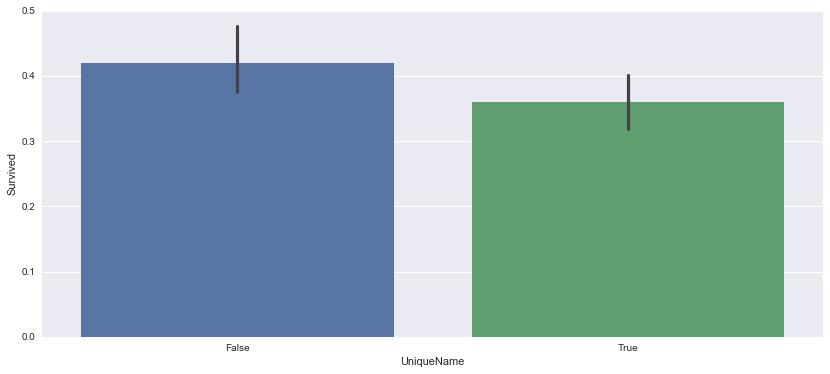

In [14]:
plt.figure(figsize=(14,6))
df_names = df_train.copy()
df_names['UniqueName'] = df_names['FamilyName'] == 'Unique'
sns.barplot("UniqueName", "Survived", data=df_names)
plt.show()

In [15]:
titles = df_train.Title
titles.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Mme               1
Lady              1
Don               1
Ms                1
Jonkheer          1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [16]:
miss = ["Ms", "Mlle"]
mrs = ["Mme"]

for df in data_cleaner:
    df["Title"] = df.Title.apply(lambda f: 'Miss' if f in miss else f)
    df["Title"] = df.Title.apply(lambda f: 'Mrs' if f in mrs else f)

titles = df_train.Title

for df in data_cleaner:
    df["Title"] = df.Title.apply(lambda f: f if f in titles.unique() and
                                     titles.value_counts()[f] > 10 else 'Rare')
df_train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

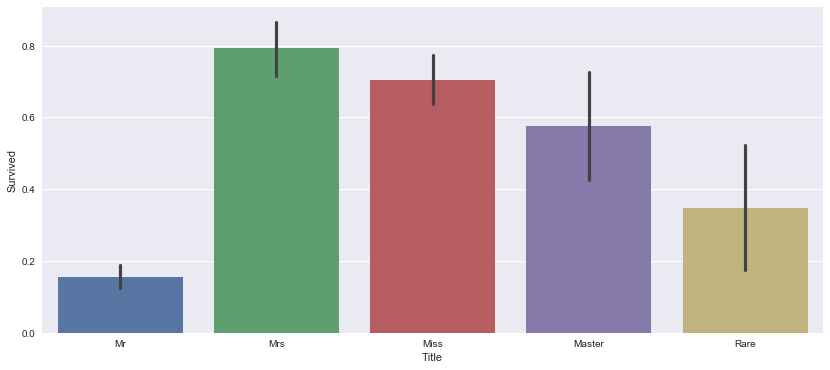

In [17]:
plt.figure(figsize=(14,6))
sns.barplot('Title', 'Survived', data=df_train)
plt.show()

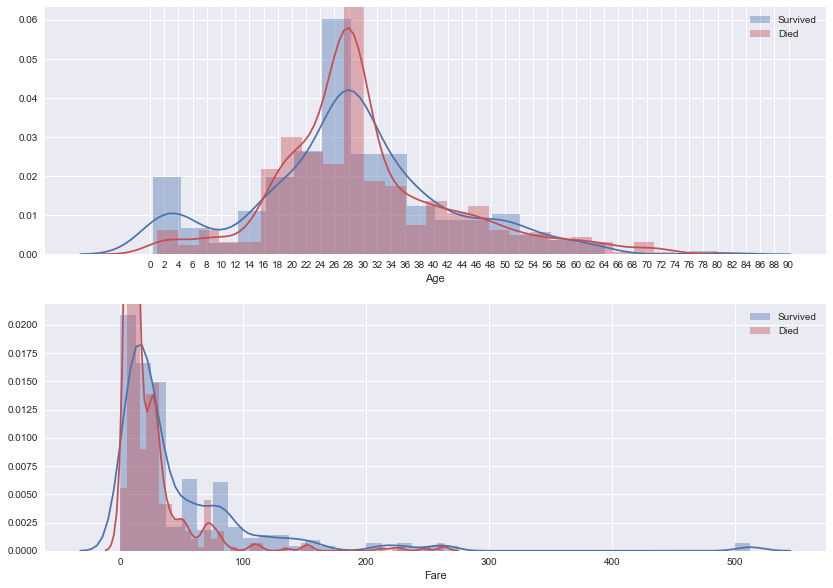

In [18]:
# Simple imputation
for df in data_cleaner:
    df["Age"].fillna(df_train.Age.median(), inplace=True)
    df["Fare"].fillna(df_train.Fare.median(), inplace=True)
    df["Embarked"].fillna(df_train.Embarked.mode()[0], inplace=True)    
    # Cant impute anything because of number of missing values
    df["Cabin"].fillna('M', inplace=True)

plt.subplot(211)
sns.distplot(df_train['Age'][df_train.Survived == 1], color='b')
sns.distplot(df_train['Age'][df_train.Survived == 0], color='r')
plt.legend(['Survived', 'Died']), plt.xticks(range(0,92,2))
plt.subplot(212)
sns.distplot(df_train['Fare'][df_train.Survived == 1], color='b')
sns.distplot(df_train['Fare'][df_train.Survived == 0], color='r')
plt.legend(['Survived', 'Died'])
plt.show()

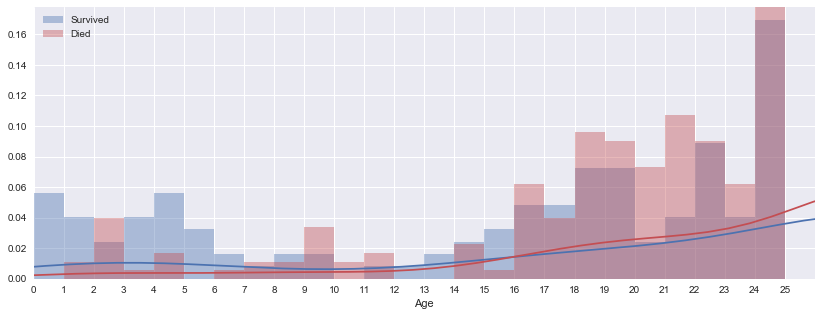

In [19]:
plt.figure(figsize=(14,5))
sns.distplot(df_train['Age'][df_train.Survived == 1], range(26), color='b')
sns.distplot(df_train['Age'][df_train.Survived == 0], range(26), color='r')
plt.xlim((0,26)), plt.xticks(range(0,26,1))
plt.legend(['Survived', 'Died'])
plt.show()

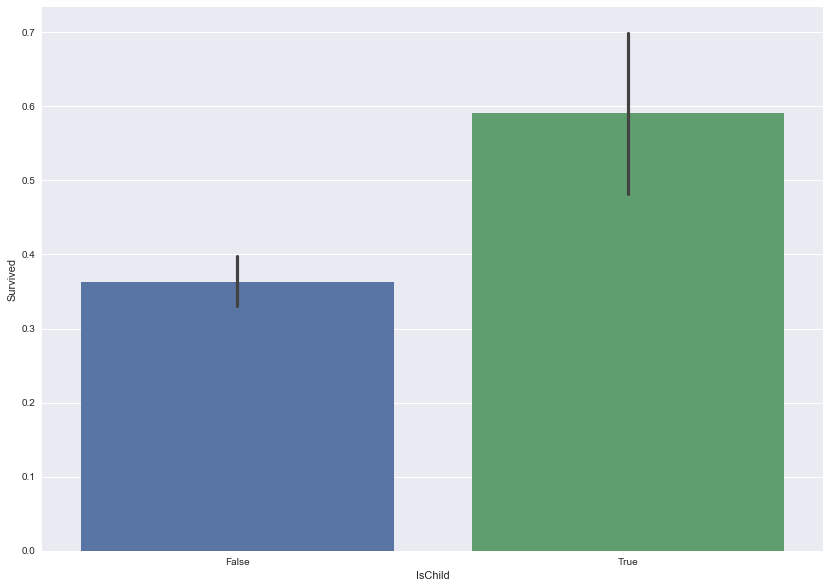

In [20]:
for df in data_cleaner:
    df['IsChild'] = df['Age'] < 16
sns.barplot('IsChild', 'Survived', data=df_train)
plt.show()

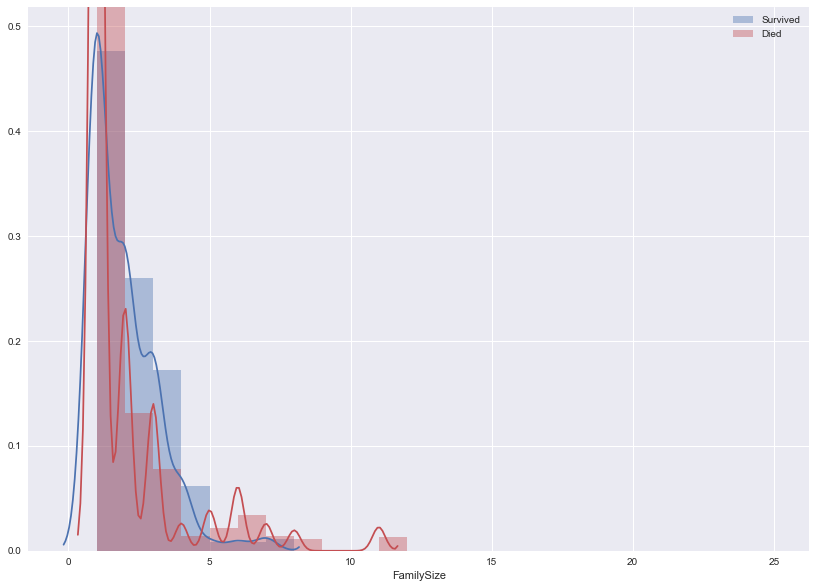

In [21]:
for df in data_cleaner:
    df["FamilySize"] = df.Parch + df.SibSp +1
sns.distplot(df_train['FamilySize'][df_train.Survived == 1], range(26), color='b')
sns.distplot(df_train['FamilySize'][df_train.Survived == 0], range(26), color='r')
plt.legend(['Survived', 'Died'])
plt.show()

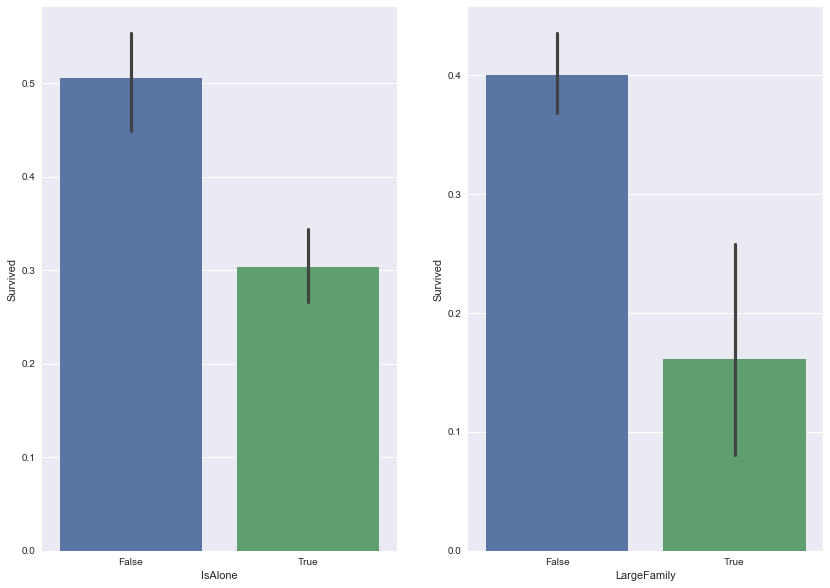

In [22]:
for df in data_cleaner:
    df["IsAlone"] = df["FamilySize"] == 1
    df["LargeFamily"] = df["FamilySize"] >= 5
plt.subplot(121)
sns.barplot('IsAlone', 'Survived', data=df_train)
plt.subplot(122)
sns.barplot('LargeFamily', 'Survived', data=df_train)
plt.show()

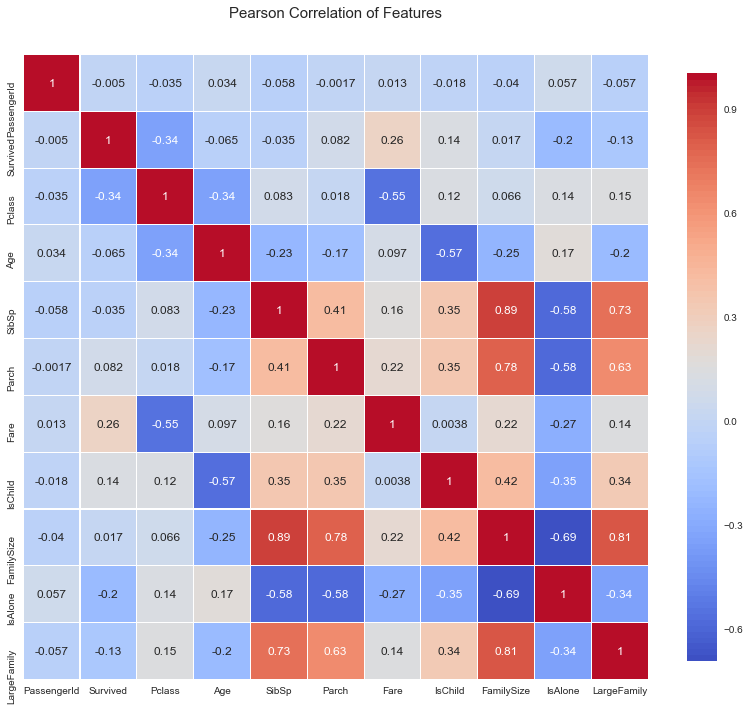

In [27]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    colormap = sns.color_palette("coolwarm", 100)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    

correlation_heatmap(df_train)
plt.show()

In [ ]:
# Writing results to csv
titanic_log_reg_test_copy = test_original.copy()
titanic_log_reg_test_copy.head()

In [ ]:
titanic_test_passenger_id_array = titanic_log_reg_test_copy.iloc[:,0].values
import csv
#writer = csv.writer(open("./data/logisticRegressionResults.csv", 'w'))
entries =[]
entries.append(["PassengerId","Survived"])
for i in range(y_predicted.size):
    entries.append([titanic_test_passenger_id_array[i],y_predicted[i]])
for i in entries:
    file = open('./data/logisticRegressionResults.csv', 'a', newline='')
    write = csv.writer(file, delimiter = ",")
    write.writerow(i)
    file.close()

In [ ]:
#Applying Naive Bayes.
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
# y values need to be raveled.
gnb_classifier.fit(X,y.ravel())
gnb_predicted = gnb_classifier.predict(X_test)
entries =[]
entries.append(["PassengerId","Survived"])
for i in range(y_predicted.size):
    entries.append([titanic_test_passenger_id_array[i],gnb_predicted[i]])
for i in entries:
    file = open('./data/NBResults.csv', 'a', newline='')
    write = csv.writer(file, delimiter = ",")
    write.writerow(i)
    file.close()